# <u> CopulAX Examples </u>
## Univariate Distributions
CopulAX provides a number of univariate distribution objects, a full list of which can be found <a href=https://github.com/tfm000/copulax/blob/main/copulax/univariate/README.md> here</a>.

These distribution objects contain standardised methods, covering almost all intended usecases. Inspection of each object also allows the user to see the implemented parameterisation and other details.

### Parameter Specification

All copulAX distribution objects utilise python dictionaries to label and hold parameters.

Each distribution object implements the `example_params` method, allowing the user to quickly and easily get a sense of what the required parameter key-value naming and form.

In [1]:
from copulax.univariate import student_t

print(student_t.example_params())

{'nu': Array(2.5, dtype=float32), 'mu': Array(0., dtype=float32), 'sigma': Array(1., dtype=float32)}


### Probability Density/Mass Functions and Culumative Density/Mass Funcitons

All univariate distribution objects (including discrete distributions for naming uniformity) have `pdf` and `cdf` methods, allowing for the evalutation of the probability density / mass and culumative density/mass functions respectively.

In [2]:
# generating a random sample
import numpy as np
sample = np.random.normal(loc=0, scale=1, size=100) * np.random.standard_t(df=5, size=100)

# calculating the PDF
student_t_example_params = student_t.example_params()
pdf = student_t.pdf(sample, student_t_example_params)
print("pdf:", pdf[:5])

# calculating the CDF
cdf = student_t.cdf(sample, student_t_example_params)
print("cdf:", cdf[:5])

pdf: [0.33131757 0.26177868 0.35503024 0.10039871 0.0944225 ]
cdf: [0.6261904  0.26838294 0.55925846 0.1083087  0.10290071]


### Percentile / Inverse CDF Function

All univariate distribution objects additionally implement `ppf` methods for calculating percentiles.

In [3]:
percentiles = [0.01, 0.1, 0.5, 0.9, 0.99]

# calculating the percentiles
percentiles_values = student_t.ppf(percentiles, student_t_example_params)
print("percentiles:", percentiles_values)

# calculating the quantiles using a cubic spline approximation
approximate_percentiles = student_t.ppf(percentiles, student_t_example_params, cubic=True)
print("approximate percentiles:", approximate_percentiles)

percentiles: [-5.3531075e+00 -1.7302492e+00  1.7881393e-06  1.7302650e+00
  5.3534312e+00]
approximate percentiles: [-5.3531070e+00 -1.7302506e+00  2.1479354e-06  1.7302659e+00
  5.3534312e+00]


### Generating Random Samples

All copulAX distribution objects are capable of generating random samples using the `rvs` method.
As copulAX is JAX based, a key is required for random number generation. 
Random keys can be generated using copulAX's `get_random_key` function, as shown below.

In [4]:
# generating a random key
from copulax import get_random_key
from jax.random import split
key = get_random_key()
key, subkey = split(key)

# generating a random sample
random_sample = student_t.rvs(size=100, params=student_t_example_params, key=subkey)
print("random sample:", random_sample[:5])

random sample: [-1.1357677   0.19325054  9.926407    1.1510693  -1.3718284 ]


### Fitting Distributions to Data

All copulAX distributions are capable of fitting parameters to a given set of observations using the `fit` method.

In [5]:
fitted_params = student_t.fit(sample)
print("fitted parameters:", fitted_params)

fitted parameters: {'nu': Array(4.8239355, dtype=float32), 'mu': Array(-0.04614773, dtype=float32), 'sigma': Array(1.5546603, dtype=float32)}


Alternatively, copulAX's `univariate_fitter` function can be used to select the univariate distribution that best models the data, according to a given metric

In [6]:
from copulax.univariate import univariate_fitter
best_fit_index, all_fitted = univariate_fitter(sample, metric='bic')
best_res = all_fitted[best_fit_index]
print("Best fit:", best_res)


Best fit: {'dist': Student-T, 'metric': Array(315.4398, dtype=float32), 'params': {'mu': Array(-0.04614773, dtype=float32), 'nu': Array(4.8239355, dtype=float32), 'sigma': Array(1.5546603, dtype=float32)}}


### All univariate distributions can be easily plotted

Plotting without a sample

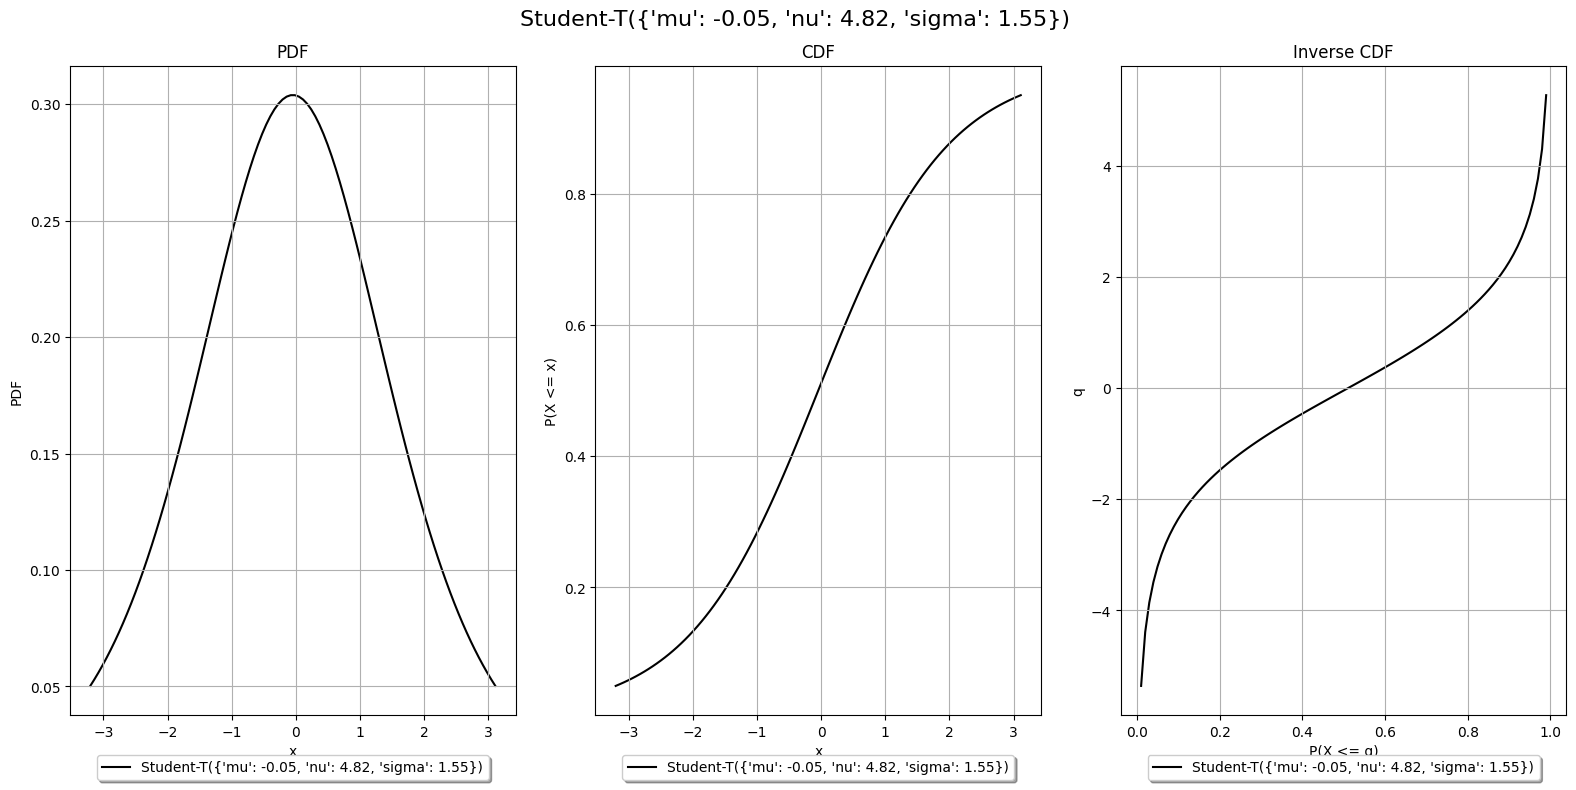

In [7]:
# getting distribution specifications
best_dist = best_res['dist']
best_params = best_res['params']
plot_domain = best_dist.ppf([0.05, 0.95], best_params)

# plotting
best_dist.plot(params=best_params, domain=plot_domain)


Plotting with a sample

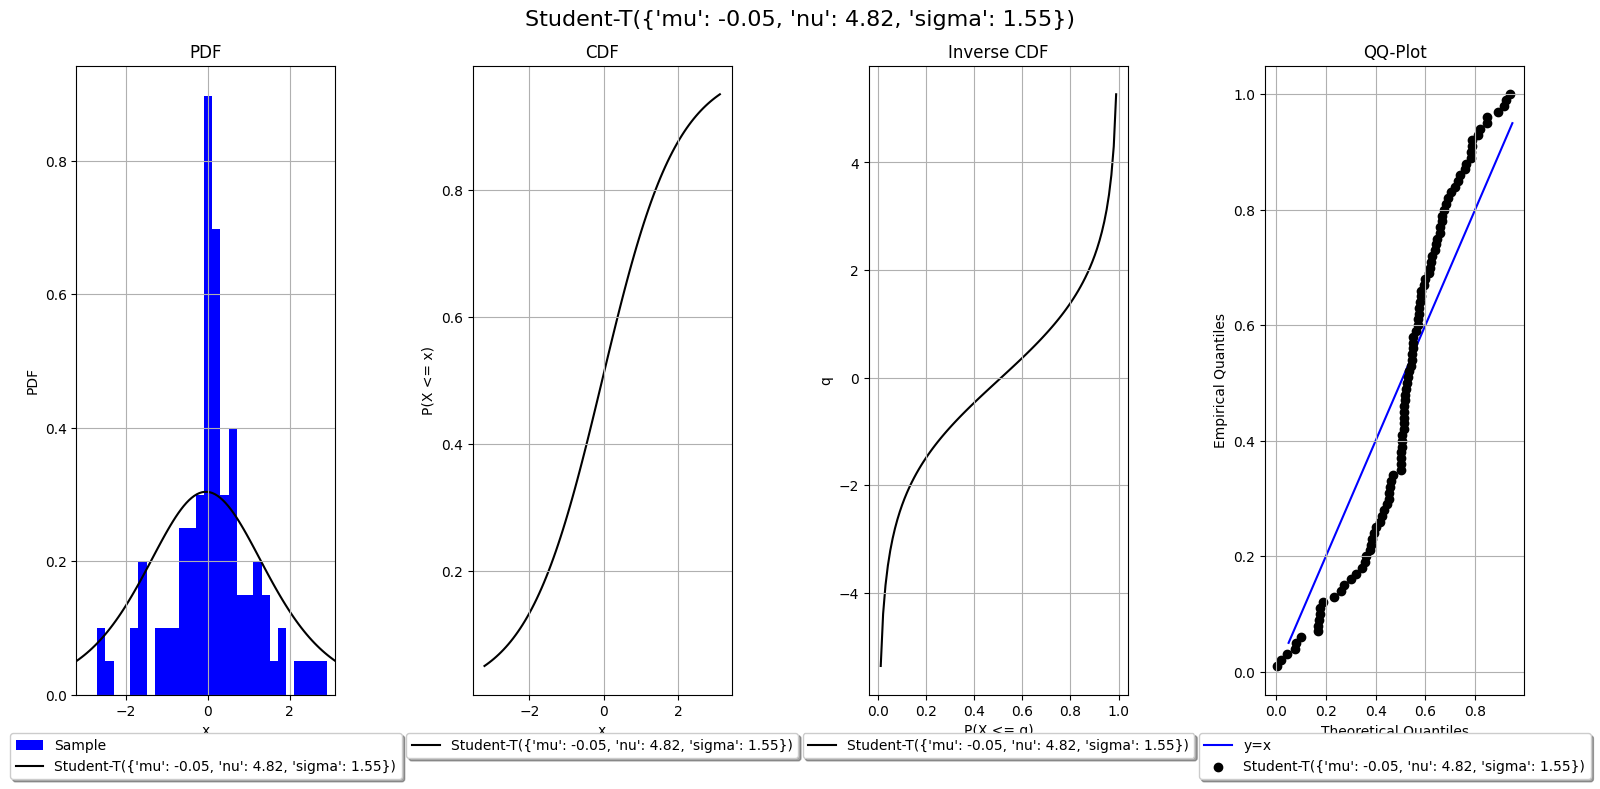

In [8]:
student_t.plot(params=best_params, sample=sample, domain=plot_domain)